# Views

Views can be used to specify a [point](#Points), line ([1D views](#1D-Views)), plane ([2D Views](#2D-Views)), volume ([3D Views](#3D-Views)) in the domain to visualize or extract data from..

The parent class, ([View](#View)) does nothing, but can be used for custom plots.

Multiple views can be combined into a [MultiView](#MultiView) object that shows, visualizes or animates multiple views simultaneously.

1D and 2D views take a number of inputs, e.g.:
- [flowVisualizer](): plots the flow of the view. Added by default for [1D views](#1D-Views) and [2D Views](#2D-Views)
- [visualizers](): List of additional plot functions, e.g. WindDirectionVisualizer, ParticleVisualizer or custom functions
- [adaptive](#Adaptive-views): controls whether the view should align with the nearest turbulence grid points or interpolate to the exact specified points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dynamiks.utils.test_utils import DefaultDWMFlowSimulation
from dynamiks.views import View, Points, XView, YView, ZView, XYView, XZView, YZView, EastNorthView, XYZView, MultiView
from dynamiks.visualizers.flow_visualizers import Flow2DVisualizer
from dynamiks.visualizers import Visualizer, WindDirectionVisualizer, ParticleVisualizer, WindTurbineVisualizer

fs = DefaultDWMFlowSimulation(x=[0,500],y=[0,0], ti=0.05, d_particle=1, n_particles=20)
fs.run(100)

**Visualization example**

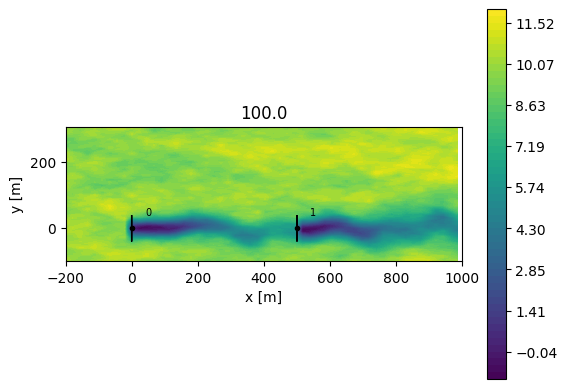

In [2]:
view=XYView(x=np.linspace(-200,1000),z=70)
fs.show(view=view) # alternatively fs.visualizer(time_stop, view) or fs.animate(time_stop, view)

**Data extraction example**

In [3]:
view = XYView(x=np.linspace(-200,1000, 5), y=np.linspace(-200,200,3),z=70, adaptive=False)
fs.get_windspeed(xyz=view, include_wakes=True, xarray=True).sel(uvw='u')

<xarray.DataArray (x: 5, y: 3)> Size: 120B
array([[10.51705374, 10.27731342,  9.77182056],
       [ 9.21618855,  0.04604624,  9.25228648],
       [10.69902295,  5.99748205, 10.42989041],
       [10.77896157,  2.67592346, 10.96343308],
       [10.22724095,  6.03060581, 10.60151545]])
Coordinates:
    uvw      <U1 4B 'u'
  * x        (x) float64 40B -200.0 100.0 400.0 700.0 1e+03
  * y        (y) float64 24B -200.0 0.0 200.0
Attributes:
    z:        70

## Points

Points takes lists of `x`, `y` and `z` coordinates of the point of interest as input. The lists must have the same length.

In [4]:

view = Points(x=[0,100,150], y=[50,75,100], z=[70,80,90])
fs.get_windspeed(xyz=view, include_wakes=True, xarray=True)

<xarray.DataArray (uvw: 3, i: 3)> Size: 72B
array([[ 9.90012378e+00,  9.75877452e+00,  1.02170120e+01],
       [ 3.29282143e-01, -1.53654229e-02, -2.84826788e-01],
       [-5.50878394e-02,  1.16043186e-04, -8.32906052e-02]])
Coordinates:
  * uvw      (uvw) <U1 12B 'u' 'v' 'w'
  * i        (i) int32 12B 0 1 2
Attributes:
    x:        [  0 100 150]
    y:        [ 50  75 100]
    z:        [70 80 90]

## 1D Views
The 1D views, `XView`, `YView` and `ZView` represent a line in the domain in the x,y and z direction respectively.

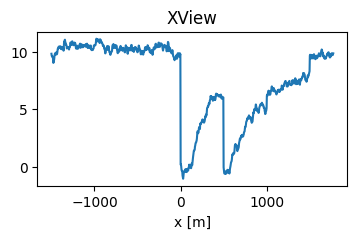

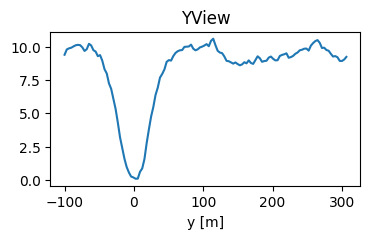

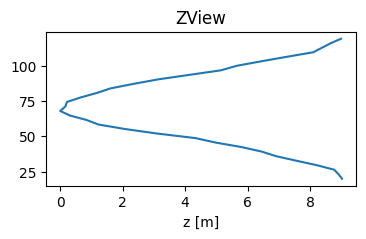

In [5]:
from dynamiks.views import XView, YView, ZView
for view in [XView(x=None, y=0, z=70, title='XView'),
                  YView(x=100, y=None, z=70, title='YView'),
                  ZView(x=100, y=0, z=None, title='ZView')]:
    plt.figure(figsize=(4,2))
    fs.show(view)

## 2D Views
The 2D views, `XYView`, `XZView` and `YZView` represent a plane in the domain.

Note, it is possible to set the `z` argument of `XYView` to `None`, in which case the mean hub height is used.

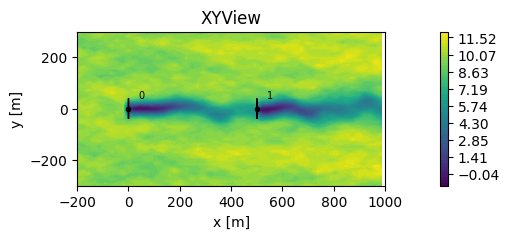

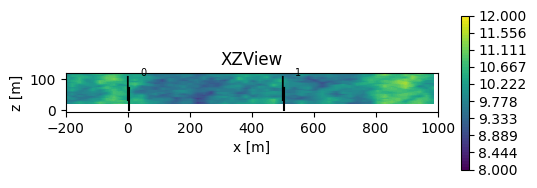

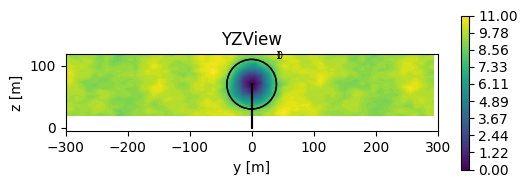

In [6]:
for view in [XYView(z=None, x=np.linspace(-200,1000), y=np.linspace(-300,300), title='XYView'),
             XZView(x=np.linspace(-200,1000), y=-125, title='XZView'),
             YZView(x=100, y=np.linspace(-300,300), title='YZView')]:
    plt.figure(figsize=(6,2))
    fs.show(view=view)

In Dynamiks, the wind direction is aligned with the x axis. This means that the farm is rotated when simulating other wind directions than 270deg.
In this case the `EastNorthView` may be more appropriate

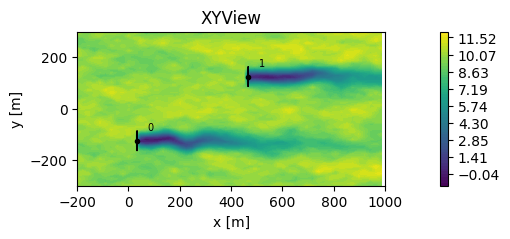

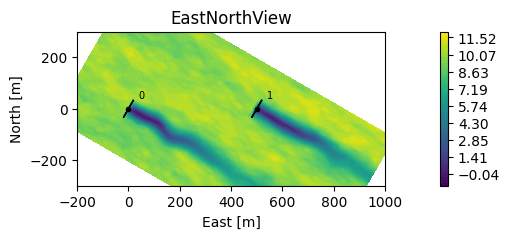

In [7]:
fs300 = DefaultDWMFlowSimulation(x=[0,500],y=[0,0], ti=0.05, d_particle=1, n_particles=20, wind_direction=300)
fs300.run(100)

for view in [XYView(x=np.linspace(-200,1000), y=np.linspace(-300,300), z=70, title='XYView'),
             EastNorthView(x=np.linspace(-200,1000), y=np.linspace(-300,300), z=70, title='EastNorthView'),
             ]:
    plt.figure(figsize=(6,2))
    fs300.show(view=view)
    

## 3D Views
The 3D view, `XYZView` represent a volume in the domain.

In [8]:
from dynamiks.views import XYZView
view = XYZView(x=np.linspace(0,1000, 2), y=np.linspace(-200,200,3), z=np.linspace(0,200,4), adaptive=False)
fs.get_windspeed(view, include_wakes=True, xarray=True).sel(uvw='u')

<xarray.DataArray (x: 2, y: 3, z: 4)> Size: 192B
array([[[ 9.26648547,  9.50081933,  9.45575286,  9.15428832],
        [ 9.72594561,  0.17983934,  9.62278659,  9.63084255],
        [ 9.41231835,  9.09802509,  9.48006457,  9.24821195]],

       [[11.17841862, 10.23303106, 11.03581242, 11.12442243],
        [ 9.37791637,  6.02015395,  9.74159665,  9.82408328],
        [11.34777089, 10.59132054, 11.29587728, 10.98744182]]])
Coordinates:
    uvw      <U1 4B 'u'
  * x        (x) float64 16B 0.0 1e+03
  * y        (y) float64 24B -200.0 0.0 200.0
  * z        (z) float64 32B 0.0 66.67 133.3 200.0

## View
All views inherrits from the `View` super class, which does not draw anything by default, but it takes the [`visualizers`](#Visualizers) input, which allows specification of custom functions

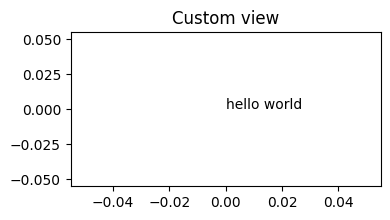

In [9]:
plt.figure(figsize=(4,2))
fs.show(View(visualizers=[lambda fs: plt.annotate("hello world",(0,0))], title='Custom view'))

## MultiView
`MultiView` allow `show`, `visualize` and `animate` to generate and display multiple view simulatenously, e.g. on subplot axes

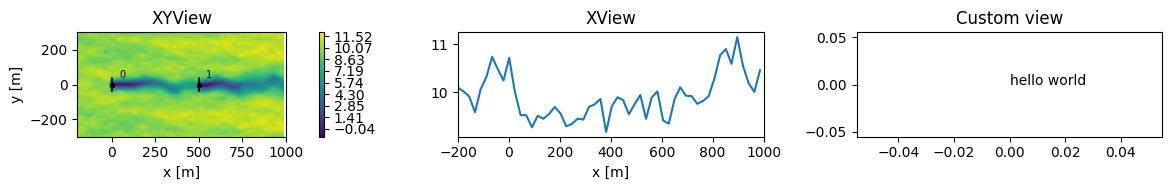

In [10]:
axes = plt.subplots(1,3, figsize=(12,2))[1]
view = MultiView([XYView(x=np.linspace(-200,1000), y=np.linspace(-300,300), z=70, title='XYView', ax=axes[0]),
                  XView(x=np.linspace(-200,1000), y=-125, z=70, title='XView', ax=axes[1]),
                  View(visualizers=[lambda fs: plt.annotate("hello world",(0,0))], title='Custom view')])
fs.show(view=view)

## View arguments

### Visualizers
The visualizer argument to views allow specification of a list of additional predefined or custom plot functions.

Some predefined visualizers are:
- `FlowVisualizer` (added to 1 and 2D views by default)
- `WindTurbineVisualizer` (added to 2D views by default)
- `ParticleVisualizer` 
- `WindDirectionVisualizer`, see below

#### FlowVisualizer
1D and 2D views take the `flowVisualizer` input argument, which defaults to `None`. The argument enables three options:
- `None` (default): A `Flow1DVisualizer` or `Flow2DVisualizer` is added to the `visualizers` list
- `False`: The flow is not plotted
- `Flow1DVisualizer` or `Flow2DVisualizer`: Allows more options:
  - `uvw`: flow component to plot, defaults to `u`, combinations, e.g. `uv` is supported
  - `include_wakes`: include wakes, default is `True`
  - `levels`: color levels (`Flow2DVisualizer` only). Number of colorlevels or list of level values. Default is 55 levels with limits dynamically adapting to the min/max observed values.
  - `colorbar`: include colorbar (`Flow2DVisualizer` only). Default is True

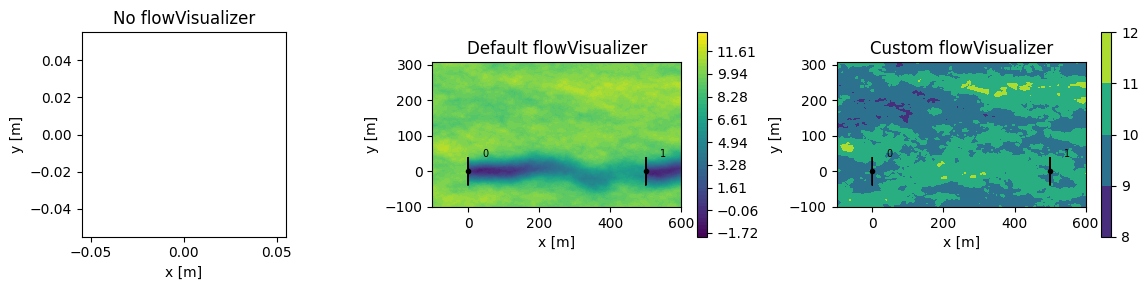

In [11]:
axes = plt.subplots(1,3, figsize=(12,3))[1]

view = MultiView([XYView(z=None, ax=axes[0], flowVisualizer=False, title='No flowVisualizer'),
                  XYView(z=None, ax=axes[1], xlim=[-100,600], title='Default flowVisualizer'), # same as flowVisualizer=None
                  XYView(z=None, ax=axes[2], xlim=[-100,600], 
                         flowVisualizer=Flow2DVisualizer(uvw='uv', include_wakes=False, levels=np.linspace(8,12,5)), title='Custom flowVisualizer')])
fs.show(view)

#### WindTurbineVisualizer
The `WindTurbineVisualizer` is automatically added the the list of visualizers for 2D views. It can be added for custom views, `View` (a `plane` field is required).

The actual turbine visualization depends on the turbine class. For `PyWakeWindTurbines` draws a projection of the disk

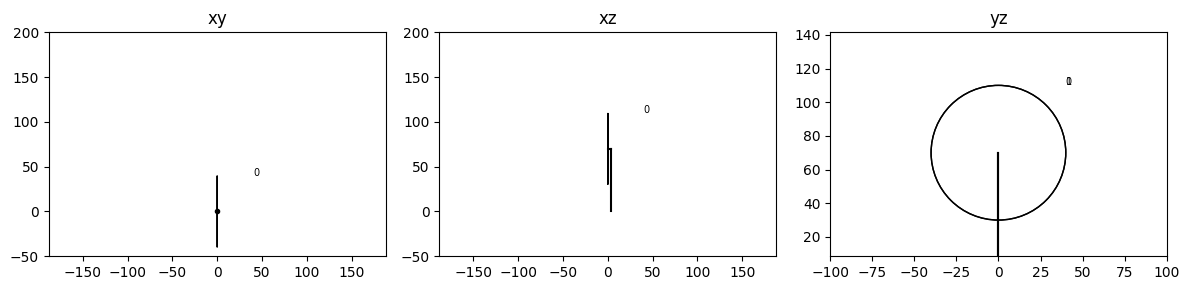

In [12]:
axes = plt.subplots(1,3, figsize=(12,3))[1]
view_lst = []
for ax, plane in zip(axes, ['xy','xz','yz']):
    view = View(visualizers=[WindTurbineVisualizer()], ax=ax, xlim=[-100,100], ylim=[-50,200], axis='equal', title=plane)
    
    view.plane = plane
    view_lst.append(view)
fs.show(MultiView(view_lst))

while `HAWC2WindTurbines` draws the rotor with lines representing the dynamic deflected blades. 

Note, the tower and shaft are drawn as straight lines, which are connected in an estimated tower top point.

In [13]:
from h2lib_tests.test_files import tfp as h2lib_tfp
from dynamiks.wind_turbines.hawc2_windturbine import HAWC2WindTurbines

htc_filename_lst = [h2lib_tfp + "DTU_10_MW/htc/DTU_10MW_RWT.htc"]
wt_h2 = HAWC2WindTurbines(x=[0], y=[0], htc_filename_lst=htc_filename_lst, types=0, suppress_output=True)
fs_h2 = DefaultDWMFlowSimulation(x=[0,500],y=[0,0], windTurbines=wt_h2, ti=0.05, d_particle=1, n_particles=20)
axes = plt.subplots(1,3, figsize=(12,3))[1]
view_lst = []
for ax, plane in zip(axes, ['xy','xz','yz']):
    view = View(visualizers=[WindTurbineVisualizer()], ax=ax, xlim=[-100,100], ylim=[-100,250], axis='scaled', title=plane)
    
    view.plane = plane
    view_lst.append(view)
fs_h2.show(MultiView(view_lst))

#### ParticleVisualizer

The `ParticleVisualizer` shows the deficit particles and their trajectories

In [14]:
axes = plt.subplots(3, 1, figsize=(6,4))[1]

fs.show(view=MultiView([
    XYView(z=None, ax=axes[0], visualizers=[ParticleVisualizer(deficit_profile=False, velocity=False)], title='Default'),
    XYView(z=None, ax=axes[1],visualizers=[ParticleVisualizer(deficit_profile=True, velocity=False)], title='deficit_profile'),
    XYView(z=None, ax=axes[2], visualizers=[ParticleVisualizer(deficit_profile=False, velocity=True)], title='velocity')]
    ))

#### WindDirectionVisualizer
The `WindDirectionVisualizer` draws arrow(s) indicating the wind direction at the specified position(s). The size of the arrows is controlled by the `scale` argument

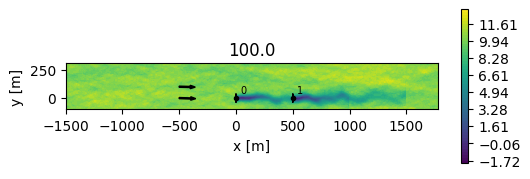

In [15]:
plt.figure(figsize=(6,2))
fs.show(view=XYView(z=None, visualizers=[
    WindDirectionVisualizer(x=[-500,-500],y=[0,100],z=[70,70],scale=10),
]))

#### Custom visualizer
Custom plotting functions can also be appended to the `visualizers` list. 

It can either be a pure function or a subclass of `Visualizer`. The pure-function option plots on the current or hard-coded axes, while the `Visualizer` subclass object has access to the axes from its parent `View`

In [16]:
plt.figure(figsize=(8,2))
def hello_world(flowSimulation):
    plt.annotate('hello world', (-1000,0)) # plot on current axis


class PowerPlotter(Visualizer):
    def __call__(self, fs):
        current_power = fs.windTurbines.sensors.to_xarray(dataset=True).power[-1]
        for (x,y,z), wt_power in zip(fs.windTurbines.positions_xyz.T, current_power):
            self.ax.annotate(f'{wt_power/1e5:.1f}MW', (x-50,y+150), fontsize=6) # self.ax points to axes of the parent view

fs.show(view=XYView(z=None, visualizers=[
    hello_world,
    PowerPlotter(),
]))

### Custom axis initialization arguments
Most `View` take the optional axis initialization arguments: `xlim`, `ylim`, `xlabel`, `ylabel`, `title`, `axis` and `clear`

In [17]:
plt.figure(figsize=(6,3))
fs.show(XYView(z=None, xlim=[-400,400], ylim=[-100,100], xlabel='My x label', ylabel='My y label', title='My title', axis='scaled', clear=True))

### Adaptive views
Most view takes the argument, `adaptive`, which controls whether the view should align with the nearest turbulence grid points or interpolate to the exact specified points.

If `adaptive=True` (default), unspecified axes, will default to the grid in the turbulence box

The benefit of adaptive views is that the interpolation step can be disregarded. The result is faster simulation and more correct turbulence (as coarse linear interpolation reduces the turbulent variations)

In [18]:
for view, l in [(ZView(x=100,y=0, adaptive=True), 'All turbulence points'),
                    (ZView(x=100,y=0, z=np.arange(40,100,10),adaptive=True), 'z~[40,50,...,90], nearest turbulence points'),
                    (ZView(x=100,y=0, z=np.arange(40,100,10),adaptive=False), 'z=[40,50,...,90], exact points'),
                    (ZView(x=100,y=0, z=np.arange(20,30),adaptive=True), 'z~[20,21,...,30], nearest turbulence points'),
                   ]:
    fs.get_windspeed(xyz=view, include_wakes=False, xarray=True).sel(uvw='u').plot(label=l, y='z', marker='.', ls=['','-'][l[0]=='A'])
    
plt.legend()
plt.grid()

Note, the reason why the green points not match the blue line is because the blue line is extracted at nearest turbulence grid point, (x,y)=(100,-0.8),  while the non-adaptive green dots are extracted at exactly (x,y)=(100,0).